<a href="https://colab.research.google.com/github/Parkseojin2001/Deep-learning_with_Python/blob/main/chapter03_introduction_to_keras_and_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.5.4 엔드-투-엔드 예제: 텐서플로 선형 분류기

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
		mean=[0, 3],
		cov=[[1, 0.5], [0.5, 1]],  # 왼쪽 아래에서 오른쪽 위로 향하는 타원형 포인트 클라우드
		size=num_samples_per_class) # 첫 번째 클래스 포인트 생성
positive_samples = np.random.multivariate_normal(
		mean=[3, 0],
		cov=[[1, 0.5], [0.5, 1]],
		size=num_samples_per_class) # 동일한 공분산 행렬과 다른 평균을 사용하여 다른 클래스의 포인트를 생성

In [12]:
# 두 클래서를 (2000, 2) 크기의 한 배열로 쌓기
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [13]:
# (0과 1로 구성된) 타깃 생성하기
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
												np.ones((num_samples_per_class, 1), dtype="float32")))

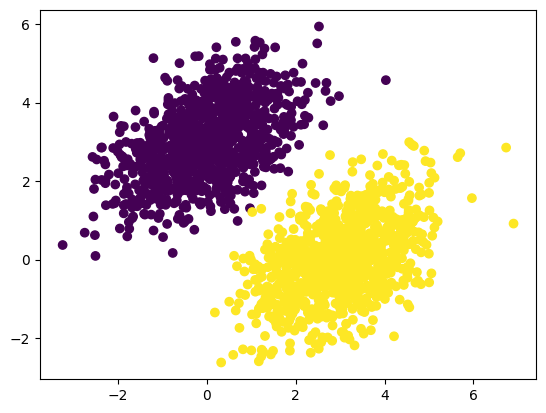

In [27]:
# 두 클래스의 포인트를 그래프로 그리기
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**두 포인트 클라우드를 구분할 수 있는 선형 분류기 만들기**

선형 분류기는 하나의 아핀 변환(prediction = W *  input + b)이며, 예측과 타깃 사이의 차이를 제곱한 값을 최소화하도록 훈련된다.

In [28]:
# 선형 분류기의 변수 만들기
input_dim = 2   # 입력은 2D 포인트
output_dim = 1  # 출력 예측은 샘플당 하나의 점수(0에 가까우면 0으로 예측, 1에 가까우면 클래스 1로 예측)
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [33]:
# 정방향 패스
def model(inputs):
  return tf.matmul(inputs, W) + b

입력 : 2D 입력<br>
가중치(weight) : w1, w2 &rarr; W = [[w1], [w2]]
편향(bias) : 하나의 스칼라 값

prediction = [[w1], [w2]] * [x, y] + b = w1 * x + w2 * y + b

In [34]:
# 평균 제곱 오차 손실 함수
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)  # targets나 predictions와 크기가 같은 텐서이며 각 샘플의 손실 값이 저장
    return tf.reduce_mean(per_sample_losses)  # 샘플당 손실 값을 하나의 스칼라 손실 값으로 평균

In [35]:
# 훈련 스텝 함수
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:   # 그레이디언트 테이프 블록 안의 정방향 패스
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])  # 가중치에 대한 손실의 그레이디언트를 구함
    W.assign_sub(grad_loss_wrt_W * learning_rate)  # 가중치 업데이트
    b.assign_sub(grad_loss_wrt_b * learning_rate)  # 편향 업데이트
    return loss

In [36]:
# 배치 훈련 루프
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 0.6404
1번째 스텝의 손실: 0.1010
2번째 스텝의 손실: 0.0881
3번째 스텝의 손실: 0.0821
4번째 스텝의 손실: 0.0773
5번째 스텝의 손실: 0.0730
6번째 스텝의 손실: 0.0690
7번째 스텝의 손실: 0.0654
8번째 스텝의 손실: 0.0621
9번째 스텝의 손실: 0.0590
10번째 스텝의 손실: 0.0562
11번째 스텝의 손실: 0.0537
12번째 스텝의 손실: 0.0513
13번째 스텝의 손실: 0.0492
14번째 스텝의 손실: 0.0472
15번째 스텝의 손실: 0.0454
16번째 스텝의 손실: 0.0437
17번째 스텝의 손실: 0.0422
18번째 스텝의 손실: 0.0408
19번째 스텝의 손실: 0.0395
20번째 스텝의 손실: 0.0384
21번째 스텝의 손실: 0.0373
22번째 스텝의 손실: 0.0363
23번째 스텝의 손실: 0.0354
24번째 스텝의 손실: 0.0346
25번째 스텝의 손실: 0.0338
26번째 스텝의 손실: 0.0331
27번째 스텝의 손실: 0.0325
28번째 스텝의 손실: 0.0319
29번째 스텝의 손실: 0.0314
30번째 스텝의 손실: 0.0309
31번째 스텝의 손실: 0.0304
32번째 스텝의 손실: 0.0300
33번째 스텝의 손실: 0.0297
34번째 스텝의 손실: 0.0293
35번째 스텝의 손실: 0.0290
36번째 스텝의 손실: 0.0287
37번째 스텝의 손실: 0.0284
38번째 스텝의 손실: 0.0282
39번째 스텝의 손실: 0.0280


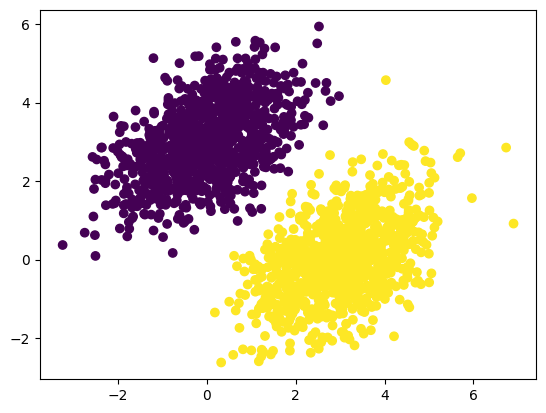

In [37]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

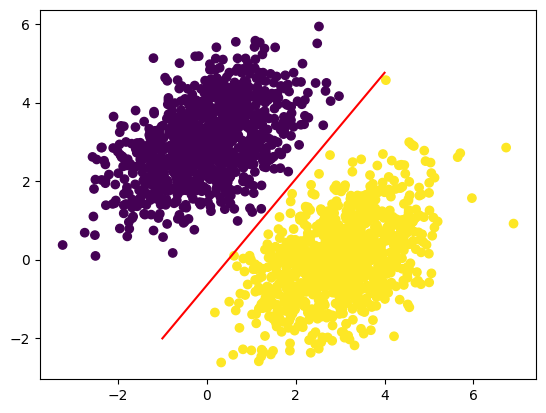

In [39]:
x = np.linspace(-1, 4, 100)   # -1~4 사이에 일정한 간격을 가진 100개의 숫자 생성
y = -W[0] / W[1] * x + (0.5 - b) / W[1] # 사용할 직선의 방정식
plt.plot(x, y, "-r")  # 직선 그리기
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5) # 동일한 그래프에 모델의 예측
plt.show()